In [1]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats

# Continuous Random Variables

The discrete random variables introduced the last two sections can model many random phenomena of interest; however, there are also many phenomena that they cannot model. Let's begin with an example based on our study of the Poisson random variable in {doc}`important-discrete-rvs`. 




## Motivating Example -- Poisson Events

The Poisson random variable models the number of events that occur in some time period for a random phenomenon with events that occur randomly over time at some specified rate $\lambda$. However, the Poisson random variable does not tell us **when** those events occur.

Let's first try to get some insight into the distribution of the event times via simulating Poisson events. Let $P$ be the number of Poisson events in an interval. Then given $P=p$ (i.e., given the number of Poisson events is some specific value $p$ to be specified later), the $p$ events should be equally likely to be anywhere in the interval being observed.  Let's simulate this scenario for the shark attack example from {doc}`important-discrete-rvs`. The average number of shark attacks per year in Volussia County was given in the referenced article as 9. Let's treat the interval as 365 days instead of 1 year, so that the resulting times are not all small decimals. 

The first thing to note is that the event times are **not discrete**. There is no need to limit our model of when events can occur to just the day, hour, or minute -- the events can occur at any non-negative real value in the observation interval. Let $T_i$, $0 \le i \le p-1$,  be the random variable representing the time that event $i$ occurs. If $T_i$ is equally likely to be any time in that interval, then $T$ is a *uniform continuous random variable*, which is usually just called a *uniform random variable.  

We are going to begin using the uniform random variable without formally defining it. Later, we will determine the important functions that characterize the uniform random variable and we will provide a careful definition at that point.

We can create a SciPy.stats object representing a continuous random variable on the interval $[0,365]$ as follows:


In [2]:
T = stats.uniform(0, 365)

Let's draw 10 random times from this interval:

In [3]:
T.rvs(10)

array([ 75.13706568, 221.62683359, 307.86457733, 262.02510152,
        96.3443498 , 156.90086614, 100.01060972, 224.69665354,
        42.69369733, 329.72337999])

We can note a few things:
* Each random variable is drawn separately and independently, and the resulting values are not sorted in any way. 
* The values are not integer.
* Although the values are meant to represent values from $[0,365]$, they are limited to values that can be represented by Python's `float` type, which has limited resolution.

Let's investigate the histogram of values drawn from this distribution. We will use 100,000 random values to allow us to create a histogram with many bins:

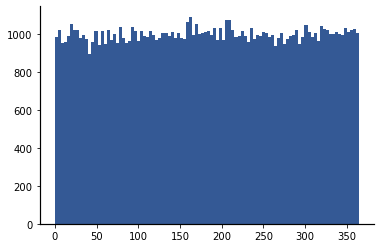

In [4]:
ts = T.rvs(100_000)
plt.hist(ts, bins = 100);


The relative frequencies are approximately equal for all of the bins, which we expect if the random values are equally likely to be anywhere in the interval. 

Now let's plot the empirical CDF, which we can get by passing `density = True` and `cumulative = True` as parameters to `plt.hist()`:

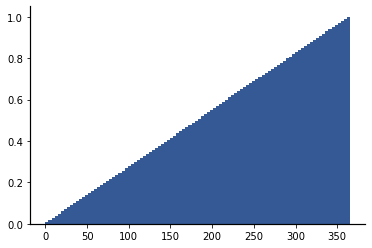

In [5]:
plt.hist(ts, bins = 100, density = True, cumulative = True);

This is a very different CDF than any we encountered in {doc}`important-discrete-rvs`. The CDF for a discrete random variable is a staircase function. By contrast, this CDF appears to be a continuous function. Let's see if we can determine the CDF for $T$. If $T$ is equally likely to be any value in $[0, 365]$, then if we choose any interval $[a,b] \subseteq [0,365]$, then the probability that $T \in [a,b]$ should be proportional to the length $b-a$.  Since the probability that $T$ is any value in $[0, 365]$ is 1, it must be that 

$$
P\left( T \in \left[a,b\right] \right)  = \frac{b-a}{365-0}, \mbox{ if} [a,b] \subseteq [0,365].
$$

In particular, note that $P(T \le t) = P(T \in [0,t])$ if $t \in [0,365]$.  Thus

$$
F_t(t) = \frac{t-0}{365} = \frac{t}{365}, ~~ 0 \le t \le 365,
$$
which is shown below on top of the empirical CDF:

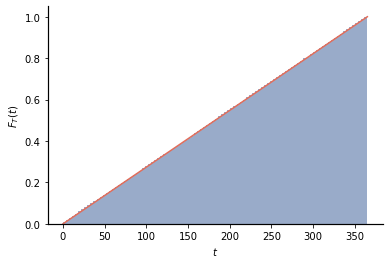

In [6]:
# Empirical CDF
plt.hist(ts, bins = 100, density = True, cumulative = True, alpha=0.5);

# Analytical CDF
tvals = np.linspace(0, 365, 366)
plt.plot(tvals, tvals/365)
plt.xlabel('$t$')
plt.ylabel('$F_T(t)$');

The empirical CDF and the analytical CDF match up almost exactly. So now we have a way to generate Poisson events: Generate a random value $P$ according to the Poisson distribution. Then generate $P$ random values from the uniform continuous  distribution on $[0, 365]$. Let's start by creating our SciPy.stats Python object with parameter 9:

In [7]:
P = stats.poisson(9)

I am including code to create the uniform time random variable for people who are running this code out of order:

In [8]:
T = stats.uniform(0, 365)

Now let's create six different realizations of the Poisson events for a year. For each realization, we draw a random number of events. We use our usual notation that (upper case) `P` denotes the SciPy random variable object and (lower case) $p$ denotes a particular value drawn from the random variable $P$. determine the arrival times for each of the $P$ events

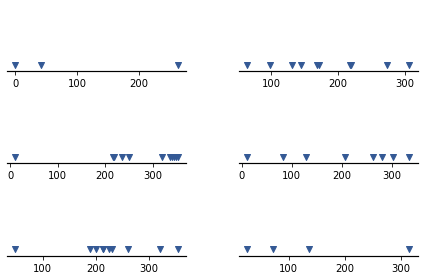

In [9]:
rows=3
cols=2
fig, axs = plt.subplots(rows, cols)
for i in range(rows):
  for j in range(cols):
    p=P.rvs()
    t=T.rvs(p)
    axs[i, j].scatter(t, 0.1*np.ones(p), marker='v' )
    axs[i, j].set_ylim(0,1)
    # Hide most of the border
    axs[i,j].spines['top'].set_visible(False)
    axs[i,j].spines['left'].set_visible(False)
    axs[i,j].spines['right'].set_visible(False)
    axs[i,j].tick_params(axis='y',          # changes apply to the x-axis
                         which='both',      # both major and minor ticks are affected
                         left=False,      # ticks along the bottom edge are off
                         right=False,         # ticks along the top edge are off
                         labelleft=False) # labels along the bottom edge are off
    plt.tight_layout()
    plt.subplots_adjust(wspace=0.3)
    #plt.show();


This approach will work to generate Poisson events. However, it is not able to answer some simple questions like *what is the distribution for the first event time?*  Let's start out by finding out what the distribution for the first event time looks like by using simulation. Let's simulate 100,000 sets of Poisson events and store the *first* event time (i.e., the minimum of the randomly generated times) for each simulation iteration:

In [10]:
num_sims = 100_000
first_event_times=[]
for sim in range(num_sims):
  p = P.rvs() # a Poisson number of events
  if p > 0:
    ts = T.rvs(p)
    first_event_times += [ ts.min() ]

Now let's plot the histogram for the first event times:

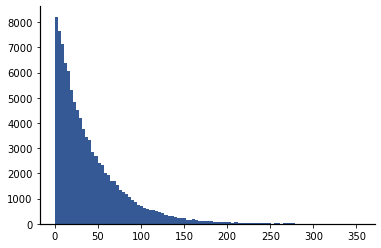

In [11]:
plt.hist(first_event_times, bins=100);

The histogram for the first event times looks very different than the histogram for a particular event's time. It clearly is not uniformly distributed on $[0,365]$. 

Here is the empirical CDF:

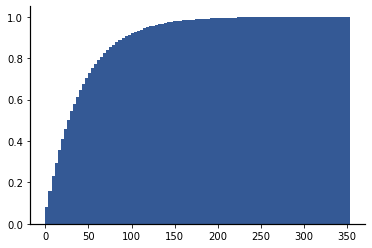

In [12]:
plt.hist(first_event_times, bins=100, density=True, cumulative=True);

Again, the CDF appears to be a continuous function.
In fact, the Poisson random variable gives us enough information to find the CDF for the first event times.  Let $T_0$ to be the time at which the first event occurs. Then suppose we want to find the probability that $T_0$ is greater than some specified value $t$. This will be true if there are no arrivals in the period $[0,t]$.  For events that occur at rate $\lambda$, the number of events that occur in the period $[0,t]$ is a Poisson random variable with parameter $\alpha_t= \lambda t$; let's refer to this Poisson random variable as $N_t$.  We can use the PMF for the Poisson random variable to give
\begin{align}
P(T_0 > t ) &= P\left(N_t = 0 \right )\\
&= \frac{\alpha_{t}^0}{0!} e^{-\alpha_t} \\
&= e^{-\lambda t}.
\end{align}

For our shark example, $\lambda =9$ attacks per year or $\lambda=9/365$ attacks per day. The figure below shows $P(T_0 >t)$ as a function of $t$:




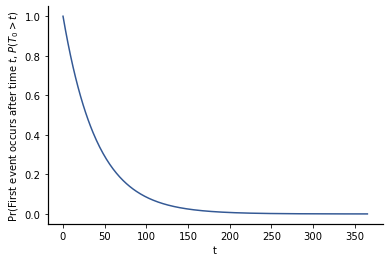

In [13]:
t = np.linspace(0,365,366)
plt.plot(t, np.exp(- 9/365 * t))
plt.xlabel('t')
plt.ylabel('Pr(First event occurs after time $t$, $P(T_0 >t)$');

We can apply some intuition to see if this makes sense. If an average of 9 events occur, then it seems likely that the first event occurs in the first $365/9 \approx 40.6$ days. The figure confirms this intuition. 

Note also that the shape of this curve resembles the shape of the histogram for the data. 

We can extend this analysis to get the histogram for $T_0$, $F_{T_0}(t) = P(T_0 \le t) = 1 -P(t) = 1 - e^{\lambda t}$.  Since $P(T_0 < 0) =0$, we can summarize its CDF as 

$$
F_{T_0} (t) = 
\begin{cases} 
1 -P(t) = 1 - e^{\lambda t}, & t \ge 0 \\
0, & t < 0
\end{cases}.
$$

The CDF is shown below for this example, plotted on the same graph as the empirical CDF:

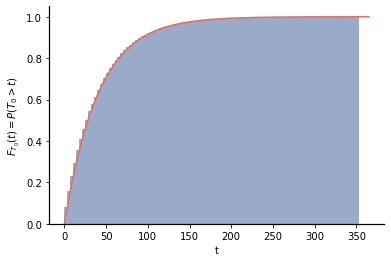

In [14]:
# Empirical CDF
plt.hist(first_event_times, bins=100, density=True, cumulative=True, alpha=0.5);

# Analytical CDF
t = np.linspace(0, 365, 366)
plt.plot(t, 1 - np.exp(- 9/365 * t))

plt.xlabel('t')
plt.ylabel('$F_{T_0}(t) = P(T_0 >t)$');

Again, the CDF is a continuous function, not a staircase function, and this is a very different CDF than for the uniform random variable.  In fact, this is the CDF of an *exponential random variable.* As with the uniform random variable, we will start to use the exponential distribution from SciPy.stats before we formally define the exponential random variable. 

Let's create a SciPy.stats object for an exponential distribution. Note that instead of the parameter $\lambda$, we need to pass the average time before an event occurs as the `scale` parameter. The average value is simply the value $365/9 \approx 40.6$ that we computed before. Below, we create a Scipy.stats object for an exponential distribution with this parameter and plot the CDF of this object on top of the empirical histogram:

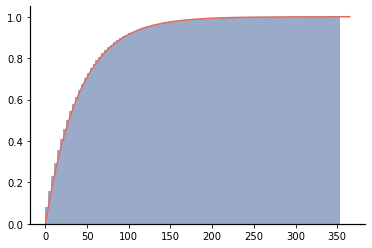

In [15]:
X = stats.expon(scale=40.6)

# Empirical CDF
plt.hist(first_event_times, bins=100, density=True, cumulative=True, alpha=0.5);

# Analytical CDF from exponential random variable object
t = np.linspace(0, 365, 366)
plt.plot(t, X.cdf(t) )

## Definition and Implications

For most purposes, the following definition of a continuous random variable will suffice:

````{card}

DEFINITION
^^^
```{glossary}
continuous uniform random variable
    A random variable $X$ that has an uncountably infinite number of values in its range 
    and for which the cumulative distribution function (CDF) $F_X(x)$ is a **continuous function of**  $x$.
```
````



You should already know what a continuous function is.  Informally, it is easiest to think of how the function looks when plotted.  A continuous function has no "breaks" in its graph, and we can imagine drawing it without having to pick up our pencil.

Mathematically, $F_X(x)$ is a continuous function at a point $x_0$ if and only 
\begin{align}
\lim_{\epsilon \rightarrow 0} F_X(x_0-\epsilon) &= F_X(x_0), \mbox{ and} \\
\lim_{\epsilon \rightarrow 0} F_X(x_0+\epsilon) &= F_X(x_0).
\end{align}
We say that the "limit from the left" and the "limit from the right" are equal to the value of $F_X()$ at $x_0$.

Then $F_X(x)$ is a continuous function if and only if it is a continuous function at every point $x$.


If $X$ is a continuous random variable, then the fact that $F_X(x)$ is a continuous random variable has an interesting implication.  Recall from {doc}`cdfs` that $P(X=x)$ is equal to the "height of the jump" in $F_X(x)$ at the point $x$. For continuous functions, there are no jumps!  Mathematically, we saw that 

$$
P(X=b) = F_X(b^+) - F_X(b^-).
$$

Since $F_X(x)$ is continuous, $F_X(x^+) = F_X(x) = F_X(x^-)$ for all $x$, and thus

$$
P(X=x) = F_X(x^+) - F_X(x^-) = F_X(x) -F_X(x) =0.
$$

Since this holds for all $x$, $P(X=x)=0$ for all $x$. This is a surprising and counterintuitive result: **none of the values that $X$ takes on have a non-zero probability.**

This is hard to understand in the abstract, so let's consider a concrete example. For the uniform random variable on $[0,1],$ the distribution function is 

$$
F_X(x) = 
\begin{cases}
0, & x<0 \\
x, & 0 \le x < 1 \\
1, & x \ge 1\\
\end{cases}.
$$

Consider the probability of a symmetric interval centered around 0.5, $P\left( X \in \left(0.5 - \epsilon, 0.5+ \epsilon \right] \right)$. Using Property 4 of the CDF, we can calculate this probability as a function of $0 < \epsilon \le 0.5$ as follows

\begin{align}
 P\left( X \in \left(0.5 - \epsilon, 0.5+ \epsilon \right] \right) & =  P ( 0.5 - \epsilon < X \le 0.5 + \epsilon) \\
 & = F_X(0.5 + \epsilon) - F_X (0.5  - \epsilon) \\
 &= (0.5 + \epsilon) - (0.5 - \epsilon) \\
 &= 2 \epsilon
\end{align}

In fact, it is not hard to see that $P\left( X \in \left(x -\epsilon, x+ \epsilon \right] \right) = 2 \epsilon$ for any $x \in (0,1)$ provided $\epsilon$ is small enough that $\left(x -\epsilon, x+ \epsilon \right] \subseteq [0,1]$.

Note that $P(X=x) \le P\left( X \in \left(x -\epsilon, x+ \epsilon \right] \right) $ for all $\epsilon > 0$. Then
\begin{align}
P(X=x) & \le \lim_{\epsilon \rightarrow 0} P\left( X \in \left(x -\epsilon, x+ \epsilon \right] \right)  \\
& = \lim_{\epsilon \rightarrow 0} 2 \epsilon = 0.
\end{align}
Since $P(X=x) \ge 0$, it must be that $P(X=x) =0$ for all $x$.
 
**If you have not encountered this before, it may seem to make no sense -- how can $X$ not have
any nonzero probabilities for any values in its range?** Let's start with an analogy. Consider a rectangular wood block, such as the  one shown below:



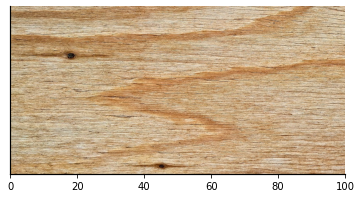

In [16]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('figs/woodblock.png')
imgplot = plt.imshow(img, extent=[0, 100, 0, 50])
ax=plt.gca()
ax.tick_params(axis='y',          # changes apply to the x-axis
               which='both',      # both major and minor ticks are affected
               left=False,      # ticks along the bottom edge are off
               right=False,         # ticks along the top edge are off
               labelleft=False) # labels along the bottom edge are off


plt.show()


If the wood block weighs 100 g and the mass is evenly distributed, how much mass is in the horizontal range $[0,50]$ ? That range contains half the block, so the answer is 1/2. How much mass is in the horizontal range $[0,x]$, where $0 \le x \le 100$? The range contains $x/100$ of the mass, so the answer is $x$ grams. But if we ask how much mass is at any point, then we are back to the same issue.  For instance, the mass at horizontal location 0 is the mass in the range $[0,0]$, which is 0 grams. 

The way to resolve this issue is that we do not specify the mass at any particular location on the horizontal axis -- instead we can specify the mass density. So, if the horizontal axis is in millimeters, then the mass density is 100 g/ 100 mm = 1 g/mm. Since the mass is assumed to be evenly distributed, the mass in any horizontal range $[x_0, x_1]$, where $0 \le x_0 < x_1 \le 100$ is then $(x_1 -x_0) \mbox{mm} \cdot (1  \mbox{g/mm}) = (x_1 -x_0)$ g. If our mass is nonuniformly distributed, then we can create a function $\rho(x)$ that gives the mass density at position $x$. Then the mass density in an interval $[x_0, x_1]$ is 

$$
\int_{x_0}^{x_1} \rho(x) ~ dx.
$$

## Density Functions 

We can apply the same idea as mass density in physical objects to probability distributions. The CDF for a random variable $X$ is the total probability in the range $(- \infty, x)$. If we want to create a probability density, $f_X(x)$, then the CDF should be the *integral* of the probability density on this range:

$$
F_X(x) = \int_{-\infty}^{x} f(u)~du.
$$

````{warning}

There are several important things to note about the equation above:

* Note again the importance of distinguishing upper-case and lower-case letters: $F_X(x)$ is a distribution function (CDF), whereas $f_X(x)$ is a density function.
* The distribution function at the point $x$ is defined as the integral of the density function from $-\infty$ to $x$. Because $x$ is in the region of integration, we **cannot use $x$ as the variable of integration**.  You can use any unused variable as the variable of integration (here, I chose $u$) to represent a variable that is changing values as we integrate from $u = -\infty$ to $u=x$.  **If you try to use $x$ both in the region of integration and as the variable of integration, the answer will almost sure come out wrong!**

````

Then we have the following definition of the probability density function (from the Fundamental Theorem of Calculus):

````{card}

DEFINITION
^^^
```{glossary}
probability density function (pdf)
    If $X$ is a continuous random variable with distribution function $F_X(x)$, then the probability density function $f_X(x)$ is 
    \begin{align} f_X(x) = \frac{d}{dx} F_X(x) \end{align}, wherever the derivative is defined.
```
````

````{note}
First note the notation:
* We will use lower-case *pdf* to denote the probability density function, in the same way that we use lower-case $f$ for this function. 
* We will use upper-case *CDF* to denote the cumulative distribution function, in the same way that we use upper-case $F$ for this function.

This consistency in capitalization will make it easier to remember the differences between these functions.  Although most books follow this convention, not all do, and you may encounter PDF to mean the probability density function in some contexts.
````


**SymPy for Derivatives**

Python has a powerful library for performing symbolic mathematics -- i.e., mathematics with variables instead of specific values. I will briefly demonstrate how to use this library to find density functions from distribution functions, and vice versa. As usual, the first step is to import the library. Here, we will use the short name `sp` to refer to SymPy:

In [17]:
import sympy as sp

The next step we will need to do is to create a variable that maps to a symbol. We can use the SymPy function `sp.symbols()` to create one or more symbols. The function `sp.symbols()` can be called with multiple different types of arguments, but we will always pass an argument that is a string containing a single variable name or a comma separated list of variable names.  The output will be a tuple that can will automatically unpack into a set of comma separated variables. We can create a SymPy symbol object for the variable $x$ as follows:

In [18]:
x = sp.symbols('x')

If we want to create SymPy objects for variables $y$ and $z$, we can use this:

In [19]:
y, z = sp.symbols( 'y,z' )

Now we can now create a function  of any of these variables. For instance, if we want to create the function $g(x) = x^2 +5x +6$, we can just do the following:

In [20]:
g = x**2 + 5*x + 6

We can take derivatives using `sp.diff()`. It takes two arguments: the function to take the derivative of, and the variable to differentiate. So we can get

$$
\frac{d}{dx} g(x)
$$
using SymPy as follows

In [21]:
sp.diff(g, x)

2*x + 5

The SymPy function `sp.integrate()` performs symbolic integration. It has a similar call pattern to `sp.diff()`: the first argument is the function to integrate, and the second argument is the variable of integration:

In [22]:
sp.integrate(2*x+5, x)

x**2 + 5*x

(Note that the integral of the derivative is only equal to the original expression up to a constant.)



Many density and distribution functions are *piecewise functions*:


````{card}

DEFINITION
^^^
```{glossary}
piecewise function
    A *piecewise function* is a function that has a different functional relationship on different regions of its variable(s).
```
````

For instance, consider again the distribution of the uniform random variable $T$ with range $[0,365]$.  We saw that if $t \in [0, 365]$, then 

$$
F_T(t) = \frac{t}{365}.
$$
However, that does not generalize to outside of this interval.  For instance, since we know that the range of $T$ is $[0,365]$, then there are no values of $T$ for which $T\le t$ if $t < 0$. For example, see below for an illustration of the relation of these regions:



```{image} figs/uniform-cdf-less-than-zero.pdf
:alt: 
:width: 320px
```


Thus,

$$
F_T(t) = P(T \le t) = 0, \mbox{ if } t<0.
$$



Similarly if $t> 365,$ then the region $T \le t$ contains the region $T \le 365$, as shown below:


```{image} figs/uniform-cdf-greater-than-365.pdf
:alt: 
:width: 320px
```

Thus, all of the probability of $T$ is contained in the region $T \le t$, and 

$$
F_T(t) = P (T \le t) = 1, \mbox{ if } t \ge 365.
$$

(We could also have considered the region $t \ge 365$, but we already have a functional relationship for $0 \le t \le 365$, which contains the pointer $t=365$.

Putting all this together, $F_T(t)$ is a piecewise function given by
\begin{equation*}
F_T(t) = 
\begin{cases}
0, & t < 0 \\
\frac{t}{365}, & 0 \le t \le 365 \\
1, & t > 365 
\end{cases}
\end{equation*}

We can use the `sp.Piecewise()` function to implement this in SymPy. The arguments of `sp.Piecewise()` are a sequence of tuples, where the first element of the tuple is the function, and the second element is the condition that specifies the region. Here is an implementation of the function $F_T(t)$ above:

In [23]:
f=sp.Piecewise( (0, x<0), (x / 365, (x >=0) & (x <=365)), (1, x >365) )
f

Piecewise((0, x < 0), (x/365, x <= 365), (1, True))

Note that the region for the second "piece" does not match the one we specified; that is because  `sp.Piecewise()` evaluates the conditions in order, so it is not necessary to specify $x \ge 0$ for the second "piece". Similarly, the last piece corresponds to every condition not covered by the first two. We could have taken advantage of this in creating SymPy version as follows:

In [24]:
f=sp.Piecewise( (0, x<0), (x / 365, x <=365), (1, True) )
f

Piecewise((0, x < 0), (x/365, x <= 365), (1, True))

SymPy can differentiate piecewise functions, but the derivative is also piecewise. This works fine if the function being differentiated is continuous, but derivatives of functions with step discontinuities (like CDFs of discrete random variables) require using generalized functions (Dirac delta functions).

Here is the density function $f_T(t)$:

In [25]:
sp.diff(f, x)

Piecewise((0, x < 0), (1/365, x <= 365), (0, True))

Note that probability densities are not probabilities. Like probabilities, they are non-negative (because a density function is the derivative of a monotonically nolen-decreasing function).  However, unlike probabilities, they are not upper-bounded by 1. For example, suppose that $U$ is a uniform random variable with range $[0, 0.1]$. Then the CDF is 

$$
F_U(u) = 
\begin{cases}
0, & u < 0 \\
\frac{u}{0.1}, & 0 \le u \ 0.1 \\
1, & u > 1
\end{cases},
$$
and the density function is 

$$
f_u(u) = \frac{d}{du} F_U(u) = 
\begin{cases}
10, & 0 \le u \ 0.1 \\
0, & \mbox{otherwise}
\end{cases}.
$$

Now consider the time to the first Poisson event, $T_0$, which has the CDF

$$
F_{T_0} (t) = 
\begin{cases} 
1 -P(t) = 1 - e^{\lambda t}, & t \ge 0 \\
0, & t < 0
\end{cases}.
$$

Then a SymPy implementation and derivative are shown below:

In [26]:
t, l=sp.symbols('t,l')
FT0 = sp.Piecewise( (0, t<0) , (1 - sp.exp(-l * t), t>=0))
FT0
                   

Piecewise((0, t < 0), (1 - exp(-l*t), True))

Then the density function is given by

$$
f_{T_0} = \frac{d}{dt} F_{T_0}(t),
$$
which is

In [27]:
fT0 = sp.diff(FT0, t)
fT0

Piecewise((0, t < 0), (l*exp(-l*t), True))

## Properties of Density Functions

**1.The probability density function is non-negative:** $f_X(x) \ge 0, -\infty < x < \infty$

*Proof:* Since the CDF, $F_X(x)$, is a nondecreasing function, its derivative is non-negative.

**2. The density function integrates to 1:**

*Proof:* From the Fundamental Theorem of Calculus and the fact that $P(-\infty)=0$, 

$$
F_X(x) = \int_{-\infty}^{x} f_X(x) dx. 
$$  

Then

$$
\int_{-\infty}^{\infty} f_X(x) dx = F_X(\infty) = 1. 
$$  

**3. Calculate the probability of an interval by integrating the density over it.** I.e.,

$$
P(a < X \le b) = \int_a^b f_X(x) dx, a \le b
$$ 

*Proof:*    
\begin{eqnarray*}
P(a< X \le b) &=& F_X(b) -F_X(a)  \\
  &=& \int_{-\infty}^{b} f_X(x)~dx - \int_{-\infty}^{a} f_X(x)~dx  \\
  &=& \int_a^b f_X(x)~dx .
\end{eqnarray*} 

**4. Calculate probabilities of any Borel set by integrating the density over that set.**
For any Borel set $B$, 

$$
P(B) = \int_B f_X(x)~dx.
$$

*Proof Sketch:*
$B$ can be written as the union of intervals, so pdf property 3 can be used to write the pdf of each interval as an integral of the pdf over the interval. Then the integral above is short-hand notation for integrating over all the intervals that make up $B$.

This is not a particularly powerful property when dealing with single random variables; however, when this property is extended to working with multiple random variables, it enables the computation of probabilities that cannot otherwise be computed.

**5. Almost any nonnegative function that integrates to 1 is a valid density function for some random variable.** 

If $g(x)$ is a nonnegative piecewise continuous function
    with finite integral 
    \begin{eqnarray*}
      \int_{-\infty}^{+\infty} g(x) dx = c, -\infty< c < +\infty, 
    \end{eqnarray*}
    then $f_X(x)=\frac{g(x)}{c}$ is a valid pdf for a random variable.
  
*The proof is beyond the scope of this text.*

Now that we have been introduced to continuous random variables, along with pdfs and their properties, we are ready to learn more about important continuous random variables and how to work with them using SciPy.stats in the next section.

## Terminology Review

In [28]:
from jupytercards import display_flashcards

#display_flashcards('flashcards/'+'continuous-rvs.json')

github='https://raw.githubusercontent.com/jmshea/Foundations-of-Data-Science-with-Python/main/'
github+='08-random-variables/flashcards/'
display_flashcards(github+'continuous-rvs.json')


